In [27]:
import matplotlib.pyplot as plt
import os
from astropy.io import fits
import numpy as np
from PIL import Image
import tifffile

In [9]:
DATA_ROOT_DIR = '/proj/case/2025-06-05'
ALL_DIRS = os.listdir(DATA_ROOT_DIR)
EUCLID_DIRS = []
CASE_DIRS = []

CASE_NUM_FILES = 22500
TOTAL_FRAMES = 450
IMG_SIZE = (2048, 2048)
DETECTOR_SIZE = (450, 2048, 2048)

In [10]:
for dir in ALL_DIRS:
    if 'Euclid' in dir:
        EUCLID_DIRS.append(dir)
    elif 'FPM' in dir:
        nested = os.listdir(f'{DATA_ROOT_DIR}/{dir}')[0]
        CASE_DIRS.append(f'{dir}/{nested}')

print(f'Euclid test data directories: {EUCLID_DIRS}\n')
print(f'Case test data directories: {CASE_DIRS}')

Euclid test data directories: ['18220_Euclid_SCA', '18248_Euclid_SCA', '18266_Euclid_SCA', '18274_Euclid_SCA', '18275_Euclid_SCA', '18282_Euclid_SCA', '18283_Euclid_SCA']

Case test data directories: ['FPM_102_101/20230908151742_ff_noise', 'FPM_102_105/20240121081913_ff_noise', 'FPM_104_103/20231125192515_ff_noise', 'FPM_EM1_EM2/20230317171948_ff_noise', 'FPM_EM3_EM6_post_vibe/20240606_163550_noise5_95k', 'FPM_EM3_EM6_pre_vibe/20240409_163902_euc_15db_noise']


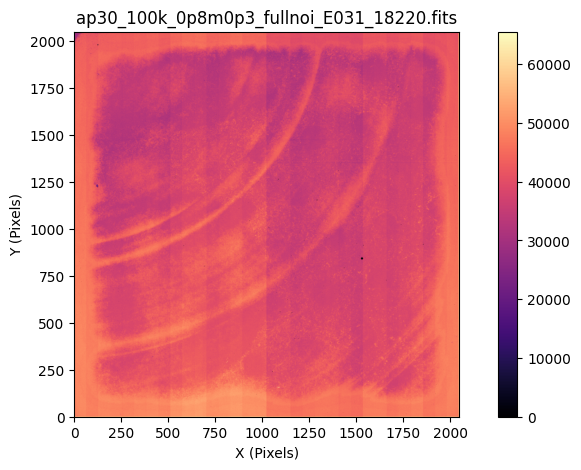

In [33]:
euclid_path = f'{DATA_ROOT_DIR}/{EUCLID_DIRS[0]}'
euclid_files = os.listdir(euclid_path)

curr_euclid_file = f'{DATA_ROOT_DIR}/{EUCLID_DIRS[0]}/{euclid_files[0]}'

# Open the current fits file
with fits.open(curr_euclid_file) as hdul:
    frame_0 = hdul[1].data.astype(np.float64)

    fig, ax = plt.subplots(figsize=(10, 5))  # Create figure and axes

    im1 = plt.imshow(frame_0, cmap = 'magma', origin = 'lower')
    plt.title(f'{euclid_files[0]}')
    plt.xlabel('X (Pixels)')
    plt.ylabel('Y (Pixels)')

    fig.colorbar(im1, ax = ax)

    plt.show()

    

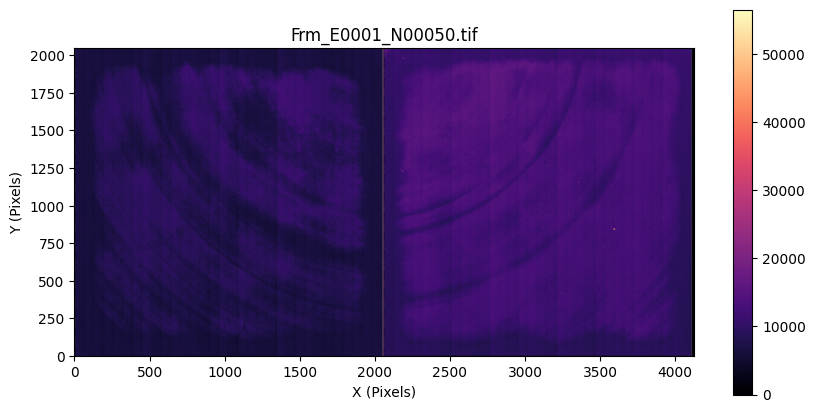

In [32]:
case_path = f'{DATA_ROOT_DIR}/{CASE_DIRS[0]}'
case_files = os.listdir(case_path)

curr_case_file = f'{DATA_ROOT_DIR}/{CASE_DIRS[0]}/{case_files[0]}'

fig, ax = plt.subplots(figsize=(10, 5))  # Create figure and axes

img = Image.open(curr_case_file)

im1 = plt.imshow(img, cmap = 'magma', origin = 'lower')
plt.title(f'{case_files[0]}')
plt.xlabel('X (Pixels)')
plt.ylabel('Y (Pixels)')
fig.colorbar(im1, ax = ax)

plt.show()


In [28]:
tif_data = tifffile.imread(curr_case_file)

# Split the data
split_index = tif_data.shape[1] // 2

detector_1 = tif_data[:, :split_index]
detector_2 = tif_data[:, split_index:]

# Take out the extra 8 columns on both sides
detector_1 = detector_1[:, 8:-8]
detector_2 = detector_2[:, 8:-8]

print(detector_1.shape)

assert detector_1.shape == (2048, 2048) and detector_2.shape == (2048, 2048)

# # Plot the two detectors
# fig, axs = plt.subplots(2, 1, figsize = (10,12))

# # Detector 1
# im1 = axs[0].imshow(detector_1, cmap = 'Greys', origin = 'lower')
# axs[0].set_title('Full Image Detector 1 (Left)')
# axs[0].set_xlabel('X (Pixels)')
# axs[0].set_ylabel('Y (Pixels)')
# plt.colorbar(im1, ax = axs[0], label = 'Counts')

# # Detector 3
# im1 = axs[1].imshow(detector_2, cmap = 'Greys', origin = 'lower')
# axs[1].set_title('Full Image Detector 2 (Right)')
# axs[1].set_xlabel('X (Pixels)')
# axs[1].set_ylabel('Y (Pixels)')
# plt.colorbar(im1, ax = axs[1], label = 'Counts')

<tifffile.TiffTag 305 @16908430> coercing invalid ASCII to bytes, due to UnicodeDecodeError('charmap', b'Matrox Imaging Library [10.00]\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x


(2048, 2048)


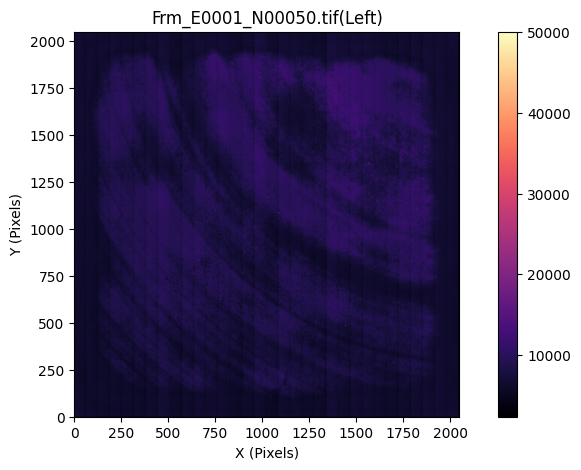

In [34]:
case_path = f'{DATA_ROOT_DIR}/{CASE_DIRS[0]}'
case_files = os.listdir(case_path)

curr_case_file = f'{DATA_ROOT_DIR}/{CASE_DIRS[0]}/{case_files[0]}'

img = Image.open(curr_case_file)

fig, ax = plt.subplots(figsize=(10, 5))  # Create figure and axes

im1 = plt.imshow(detector_1, cmap = 'magma', origin = 'lower')
plt.title(f'{case_files[0]}(Left)')
plt.xlabel('X (Pixels)')
plt.ylabel('Y (Pixels)')

fig.colorbar(im1, ax = ax)

plt.show()

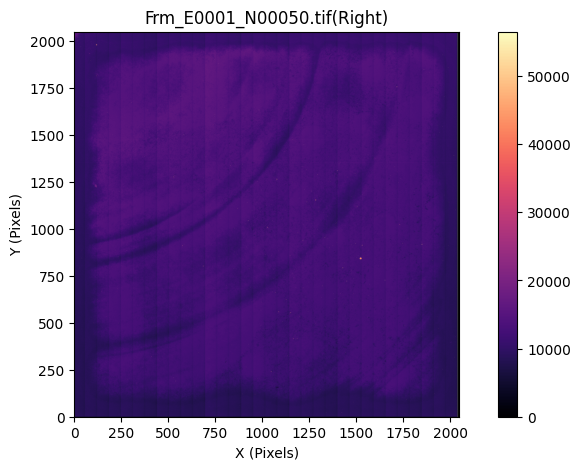

In [36]:
case_path = f'{DATA_ROOT_DIR}/{CASE_DIRS[0]}'
case_files = os.listdir(case_path)

curr_case_file = f'{DATA_ROOT_DIR}/{CASE_DIRS[0]}/{case_files[0]}'

img = Image.open(curr_case_file)

fig, ax = plt.subplots(figsize=(10, 5))  # Create figure and axes

im1 = plt.imshow(detector_2, cmap = 'magma', origin = 'lower')
plt.title(f'{case_files[0]}(Right)')
plt.xlabel('X (Pixels)')
plt.ylabel('Y (Pixels)')

fig.colorbar(im1, ax = ax)

plt.show()

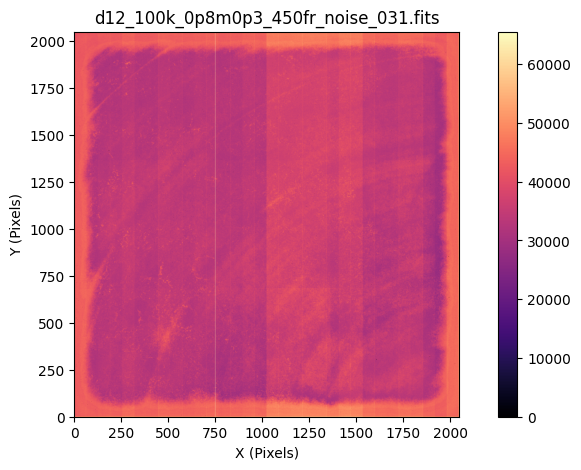

In [39]:
euclid_path = f'{DATA_ROOT_DIR}/{EUCLID_DIRS[len(EUCLID_DIRS)-1]}'
euclid_files = os.listdir(euclid_path)

curr_euclid_file = f'{DATA_ROOT_DIR}/{EUCLID_DIRS[len(EUCLID_DIRS)-1]}/{euclid_files[0]}'

# Open the current fits file
with fits.open(curr_euclid_file) as hdul:
    frame_0 = hdul[1].data.astype(np.float64)

    fig, ax = plt.subplots(figsize=(10, 5))  # Create figure and axes

    im1 = plt.imshow(frame_0, cmap = 'magma', origin = 'lower')
    plt.title(f'{euclid_files[0]}')
    plt.xlabel('X (Pixels)')
    plt.ylabel('Y (Pixels)')

    fig.colorbar(im1, ax = ax)

    plt.show()

    

In [42]:
frame_0.shape

(2048, 2048)